# Dataset Analysis

Prior to executing training tasks, performing comprehensive dataset feature analysis is essential. This process enables systematic evaluation of training memory requirements through statistical characteristics (e.g., edge distribution in individual graph structures), informs parameter configuration strategies (including neural network irreducible representations), and guides performance expectation assessments while establishing model evaluation baselines.

## Edge number statistics

User can use the terminal tool to analyze the edge number of the structures in the dataset. The edge number is related to the memory usage and speed of the training/inference processes. 
```bash
dock analyze dataset edge ./inputs -p 4
```
The description of the arguments can be shown by
```bash
dock analyze dataset edge -h
```
```
Usage: dock analyze dataset edge [OPTIONS] DATA_PATH

  Statistic and show edge related information.

Options:
  -p, --parallel-num INTEGER  The parallel processing number, -1 for using all of the cores.  [default: -1]
  -t, --tier-num INTEGER      The tier number of the dft data directory, -1 for <data_path>/dft, 0 for <data_path>/dft/<data_dirs>, 1 for <data_path>/dft/<tier1>/<data_dirs>, etc. [default: 0]
  --edge-bins INTEGER         The bins count width, default is auto decided.
  --plot-dpi INTEGER          The bin count plot DPI.  [default: 300]
  -h, --help                  Show this message and exit.
```

For advanced users, deeph-dock provides the `DatasetAnalyzer` class.

In [ ]:
from deepx_dock.analyze.dataset.analyze_dataset import DatasetAnalyzer

data_path = "./inputs"
parallel_num = 4
tier_num = 0
edge_bins = None
plot_dpi = 300

inspector = DatasetAnalyzer(
    data_path=data_path,
    n_jobs=parallel_num,
    n_tier=tier_num,
)
features = inspector.gen_dft_features()
inspector.statistic_edge_quantity(
    features=features,
    bins=edge_bins,
)

```
[do] Locate all DFT data directories ...
[rawdata] Processing DFT data in inputs/dft.
  +-[search]: 13it [00:00, 10429.60it/s]
[rawdata] Found 13 structures in inputs/dft.
```

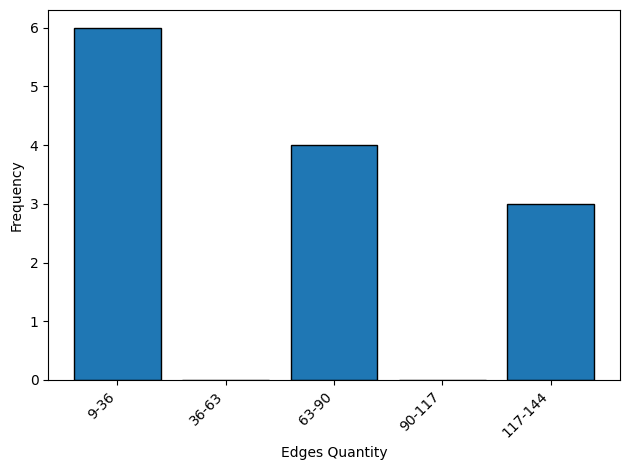

In [3]:
inspector.plot_edge_quantity(dpi=plot_dpi)

## Dataset split generation

User can use the terminal tool to split the dataset into train set, validation set, and test set. A json file containing the split structure names is dumped.
```bash
dock analyze dataset split ./inputs -p 4
cat ./dataset_split.json
```
```json
{"train": ["25001", "1001", "4992", "25000", "4990", "4991", "4995"], "validate": ["25003", "4994"], "test": ["1002", "4993", "25002", "1000"]}
```
The description of the arguments can be shown by
```bash
dock analyze dataset split -h
```
```
Usage: dock analyze dataset split [OPTIONS] DATA_PATH

  Generate train, validate, and test data split json file.

Options:
  -p, --parallel-num INTEGER      The parallel processing number, -1 for using all of the cores.  [default: -1]
  -t, --tier-num INTEGER          The tier number of the dft data directory, -1 for <data_path>/dft, 0 for <data_path>/dft/<data_dirs>, 1 for <data_path>/dft/<tier1>/<data_dirs>, etc. [default: 0]
  --split-ratio <FLOAT FLOAT FLOAT>...
                                  The train_ratio, validate_ratio and test_ratio of the split data.  [default: 0.6, 0.2, 0.2]
  --split-max-edge-num INTEGER    The max edge number of the split data, -1 for no constraint.  [default: -1]
  --split-rng-seed INTEGER        The random seed for processing dataset. [default: 137]
  -h, --help                      Show this message and exit.
```

The class API is also provided.

In [ ]:
from deepx_dock.analyze.dataset.analyze_dataset import DatasetAnalyzer

data_path = "./inputs"
parallel_num = 4
tier_num = 0
split_ratio = [0.6, 0.2, 0.2]
split_max_edge_num = -1
split_rng_seed = 137

inspector = DatasetAnalyzer(
    data_path=data_path,
    n_jobs=parallel_num,
    n_tier=tier_num,
)
features = inspector.gen_dft_features()
inspector.generate_data_split_json(
    features=features,
    train_ratio=split_ratio[0],
    val_ratio=split_ratio[1],
    test_ratio=split_ratio[2],
    max_edge_num=split_max_edge_num,
    rng_seed=split_rng_seed,
)

```
[do] Locate all DFT data directories ...
[rawdata] Processing DFT data in `inputs/dft`.
  +-[search]: 13it [00:00, 10233.85it/s]
[rawdata] Found `13` structures in `inputs/dft`.
Data Split: 100%|██████████| 13/13 [00:00<00:00, 27.47it/s]
[info] Total available data dirs: 13
[info] Data split json saved to ./dataset_split.json.
```